In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

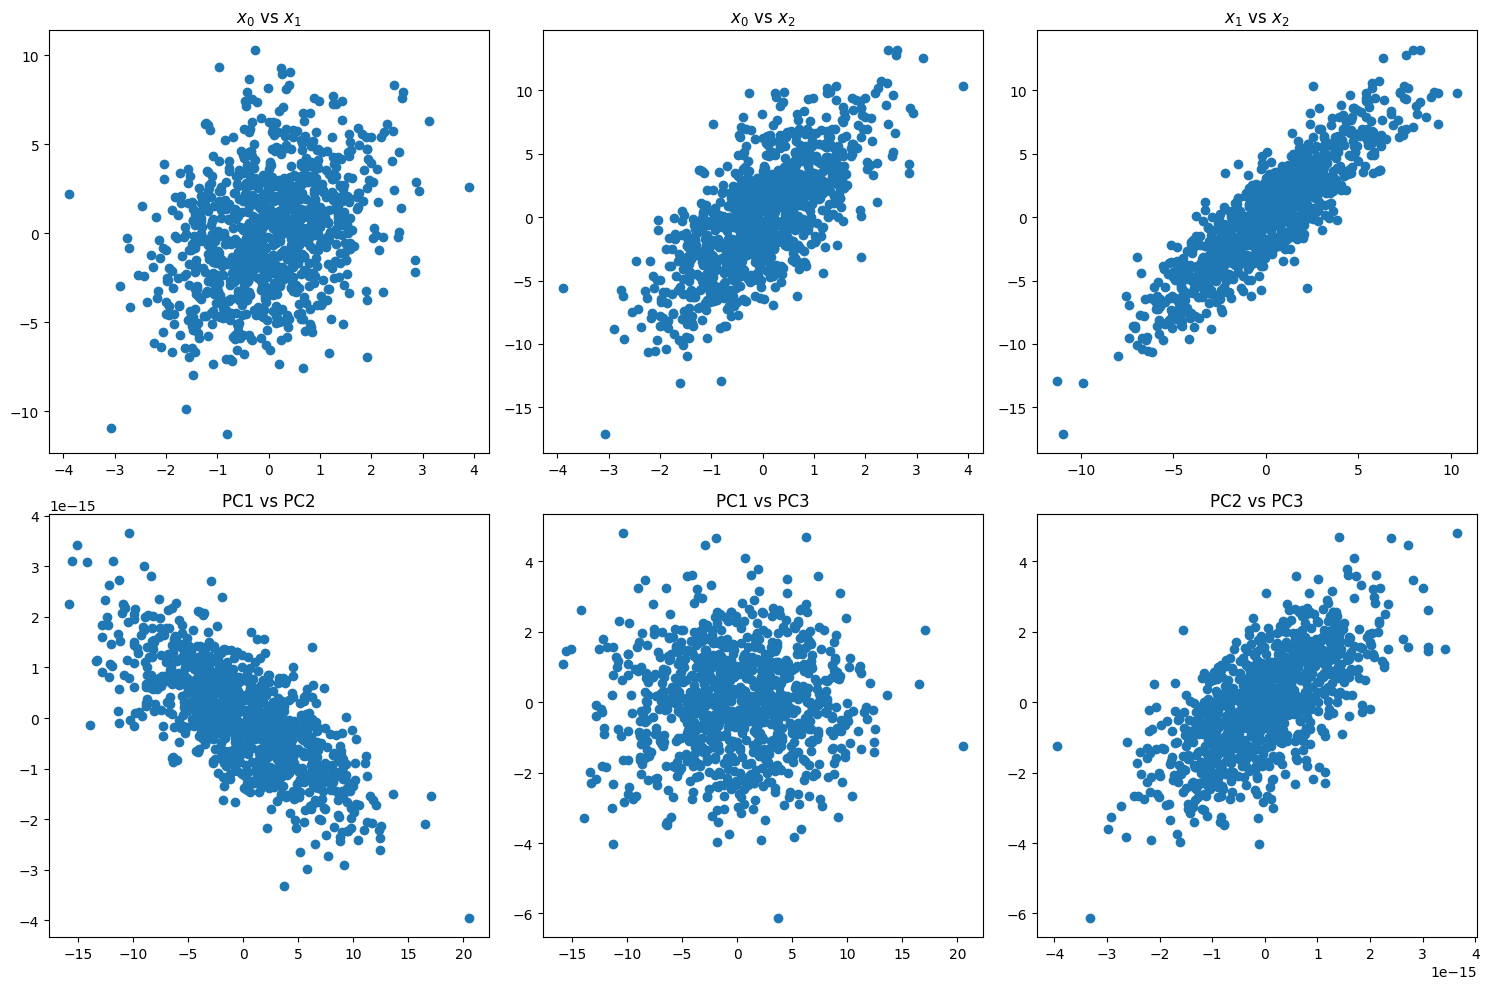

In [2]:
N = 1000

mu = [0, 0, 0]
sigma = [1, 3, 1]

x1 = np.random.normal(mu[0], sigma[0], N)
x2 = x1 + np.random.normal(mu[1], sigma[1], N)
x3 = 2 * x1 + x2

data = np.vstack([x1, x2, x3]).T

#Covariance matrix
cov_matrix = np.cov(data, rowvar=False)

#Eigendecomposition of the covariance matrix
eigenvalues_cov, eigenvectors_cov = np.linalg.eig(cov_matrix)

#Singular Value Decomposition (SVD)
u, s, vh = np.linalg.svd(data - np.mean(data, axis=0), full_matrices=False)

eigenvalues_svd = s**2

eigenvectors_svd = vh.T

#Percentage of total variability explained by each principal component
explained_var_ratio = eigenvalues_cov / np.sum(eigenvalues_cov)

cumulative_var_ratio = np.cumsum(explained_var_ratio)

#Number of principal components needed to retain at least 99% of the variability
num_components_99 = np.argmax(cumulative_var_ratio >= 0.99) + 1

projection_matrix = eigenvectors_cov[:, :num_components_99]
reduced_data = np.dot(data, projection_matrix)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title('$x_0$ vs $x_1$')

plt.subplot(2, 3, 2)
plt.scatter(data[:, 0], data[:, 2])
plt.title('$x_0$ vs $x_2$')


plt.subplot(2, 3, 3)
plt.scatter(data[:, 1], data[:, 2])
plt.title('$x_1$ vs $x_2$')

plt.subplot(2, 3, 4)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('PC1 vs PC2')

plt.subplot(2, 3, 5)
plt.scatter(reduced_data[:, 0], reduced_data[:, 2])
plt.title('PC1 vs PC3')

plt.subplot(2, 3, 6)
plt.scatter(reduced_data[:, 1], reduced_data[:, 2])
plt.title('PC2 vs PC3')

plt.tight_layout()
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Number of Principal Components needed to retain 99% of variability:
Before adding noise: 3
After adding noise: 2


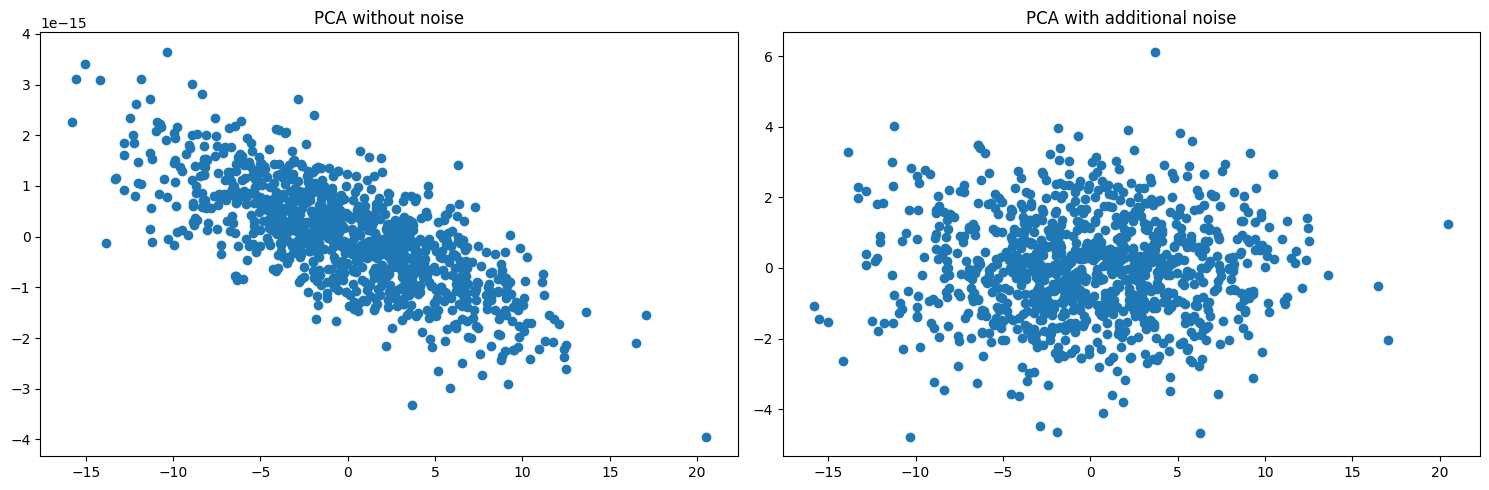

In [3]:
num_noise_variables = 10
noise_std_factor = 20

noise = np.random.normal(0, sigma[0] / noise_std_factor, size=(N, num_noise_variables))

#Add noise to the original dataset
data_with_noise = np.hstack([data, noise])

cov_matrix_with_noise = np.cov(data_with_noise, rowvar=False)

eigenvalues_cov_with_noise, eigenvectors_cov_with_noise = np.linalg.eig(cov_matrix_with_noise)

#Singular Value Decomposition (SVD) for the updated dataset
u_with_noise, s_with_noise, vh_with_noise = np.linalg.svd(data_with_noise - np.mean(data_with_noise, axis=0), full_matrices=False)


eigenvalues_svd_with_noise = s_with_noise**2

eigenvectors_svd_with_noise = vh_with_noise.T


explained_var_ratio_with_noise = eigenvalues_cov_with_noise / np.sum(eigenvalues_cov_with_noise)


cumulative_var_ratio_with_noise = np.cumsum(explained_var_ratio_with_noise)

num_components_99_with_noise = np.argmax(cumulative_var_ratio_with_noise >= 0.99) + 1


projection_matrix_with_noise = eigenvectors_cov_with_noise[:, :num_components_99_with_noise]
reduced_data_with_noise = np.dot(data_with_noise, projection_matrix_with_noise)


print("Number of Principal Components needed to retain 99% of variability:")
print("Before adding noise:", num_components_99)
print("After adding noise:", num_components_99_with_noise)


plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title('PCA without noise')


plt.subplot(1, 2, 2)
plt.scatter(reduced_data_with_noise[:, 0], reduced_data_with_noise[:, 1])
plt.title('PCA with additional noise')

plt.tight_layout()
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [4]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

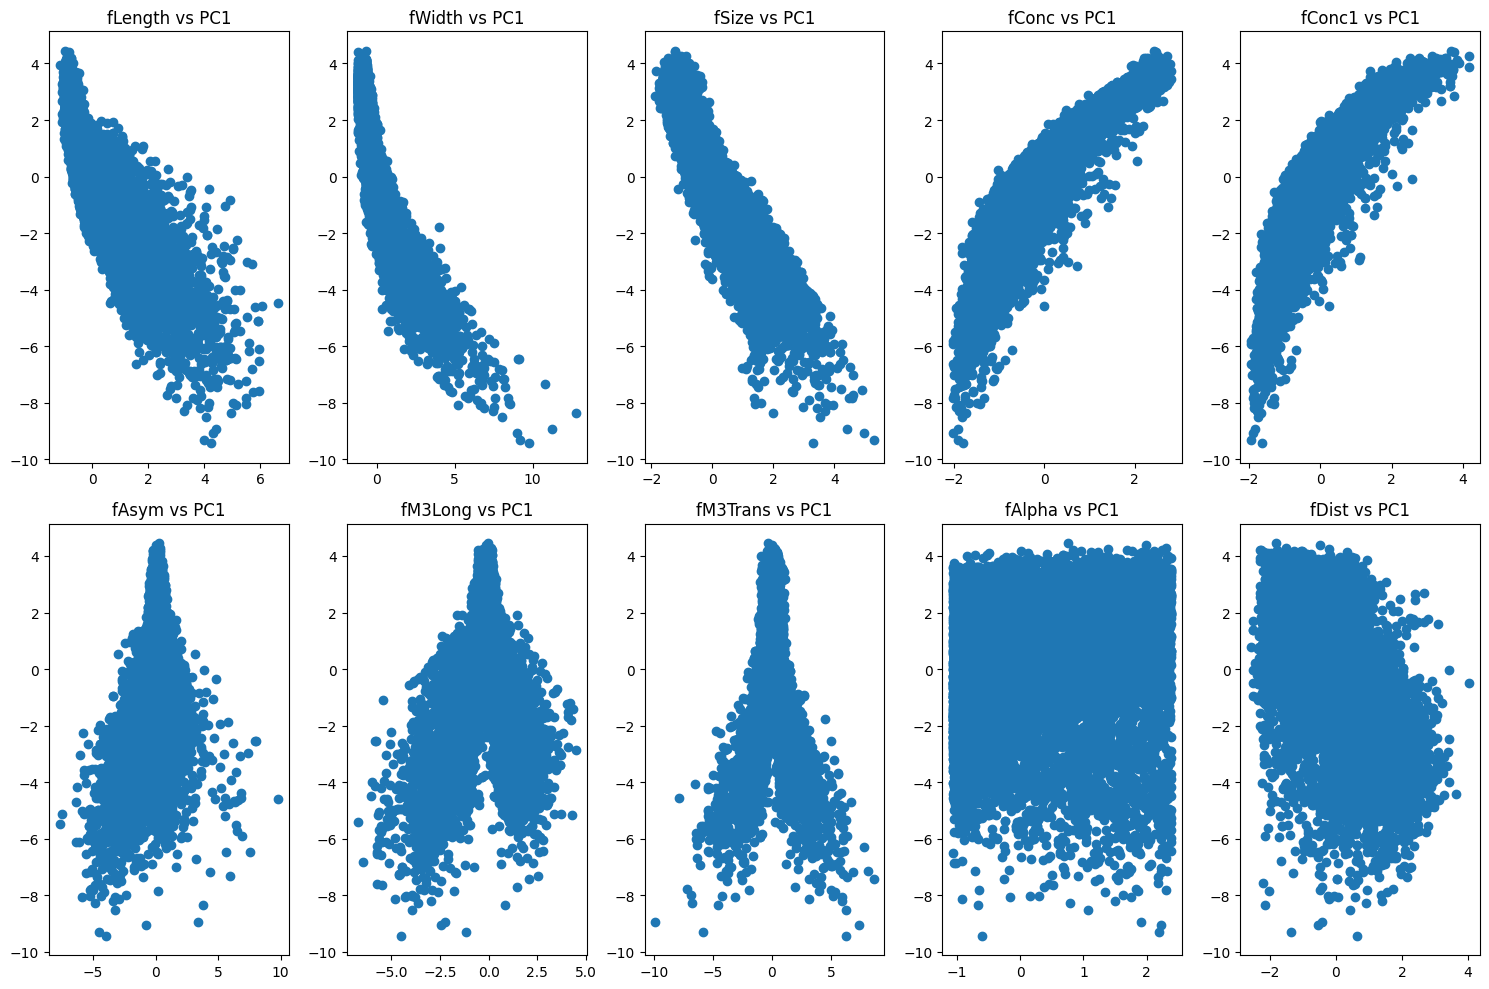

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
column_names = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
data = pd.read_csv(url, names=column_names)


X = data.drop("class", axis=1)
y = data["class"]


X_standardized = (X - X.mean()) / X.std()


cov_matrix = np.cov(X_standardized, rowvar=False)


eigenvalues_cov, eigenvectors_cov = np.linalg.eig(cov_matrix)

#Singular Value Decomposition (SVD)
u, s, vh = np.linalg.svd(X_standardized, full_matrices=False)

eigenvalues_svd = s**2

eigenvectors_svd = vh.T

explained_var_ratio = eigenvalues_cov / np.sum(eigenvalues_cov)

cumulative_var_ratio = np.cumsum(explained_var_ratio)


num_components_99 = np.argmax(cumulative_var_ratio >= 0.99) + 1

projection_matrix = eigenvectors_cov[:, :num_components_99]


reduced_data = np.dot(X_standardized, projection_matrix)


num_features = X.shape[1]
num_rows = 2
num_cols = (num_features + num_rows - 1) // num_rows  # Calculate the number of columns dynamically
plt.figure(figsize=(15, 10))

plot_index = 1
for i in range(num_features):
    plt.subplot(num_rows, num_cols, plot_index)
    plt.scatter(X_standardized.iloc[:, i], reduced_data[:, 0])
    plt.title(f'{X.columns[i]} vs PC1')
    plot_index += 1

plt.tight_layout()
plt.show()
